IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("../data/raw_data.csv")
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Convert date columns to datetime

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

df[['order_date', 'ship_date']].dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

Converting 'sales' from object to integer

In [5]:
df['sales'].head(10)


0    408
1    120
2     66
3     45
4    114
5     55
6    314
7    276
8    912
9    667
Name: sales, dtype: object

In [7]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['sales'].dtype


dtype('float64')

Verifying


In [8]:
df['sales'].isna().sum()


np.int64(2630)

Identify the bad rows

In [9]:
df[df['sales'].isna()].head(10)


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
27,MX-2011-111255,2011-04-01,2011-09-01,Second Class,Russell Applegate,Consumer,Parana,Brazil,LATAM,South,FUR-BO-10001498,Furniture,Bookcases,"Dania Classic Bookcase, Pine",NaN,6,0.0,609.8400,109.13,Medium,2011
43,MX-2011-109267,2011-05-01,2011-09-01,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,North,OFF-AP-10004245,Office Supplies,Appliances,"Hoover Stove, Black",NaN,8,0.0,999.3600,191.20,Medium,2011
58,CA-2011-167199,2011-07-01,2011-11-01,Standard Class,Maria Etezadi,Home Office,Kentucky,United States,US,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,NaN,9,0.0,746.4078,258.99,High,2011
83,AO-2011-1670,2011-08-01,NaT,Standard Class,Henia Zydlo,Consumer,Benguela,Angola,Africa,Africa,FUR-IKE-10001539,Furniture,Bookcases,"Ikea Classic Bookcase, Pine",NaN,6,0.0,49.5000,349.87,High,2011
84,IN-2011-19330,2011-08-01,2011-12-01,Second Class,Nicole Fjeld,Home Office,Yunnan,China,APAC,North Asia,TEC-MA-10002468,Technology,Machines,"Panasonic Inkjet, White",NaN,7,0.0,260.8200,275.52,Medium,2011
100,IN-2011-61302,2011-10-01,2011-11-01,First Class,Dan Lawera,Consumer,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",NaN,5,0.1,511.0950,665.27,Medium,2011
125,ES-2011-5158390,2011-11-01,2011-11-01,Same Day,Roy Collins,Consumer,England,United Kingdom,EU,North,FUR-CH-10004255,Furniture,Chairs,"SAFCO Executive Leather Armchair, Red",NaN,3,0.0,13.7700,178.98,Medium,2011
126,US-2011-163874,2011-11-01,2011-12-01,First Class,Philip Fox,Consumer,México,Mexico,LATAM,North,OFF-ST-10003741,Office Supplies,Storage,"Smead Lockers, Blue",NaN,10,0.0,238.0000,103.84,Medium,2011
163,EG-2011-4270,NaT,NaT,Standard Class,Roger Demir,Consumer,Aswan,Egypt,Africa,Africa,TEC-HP -10001574,Technology,Copiers,"HP Fax Machine, Laser",NaN,4,0.0,479.8800,55.62,Medium,2011
173,CA-2011-157147,NaT,NaT,Standard Class,Brian Dahlen,Consumer,California,United States,US,West,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,NaN,5,0.0,238.6530,187.65,High,2011


In [10]:
df.loc[df['sales'].isna(), 'sales'].value_counts().head(10)


Series([], Name: count, dtype: int64)

In [11]:
initial_rows = len(df)

df = df.dropna(subset=['sales'])

final_rows = len(df)

initial_rows, final_rows


(51290, 48660)

About 5% of records had non-convertible sales values.
Since sales is a primary metric and the values couldn’t be reliably recovered, those records were excluded to preserve analytical integrity.

ANALYSIS

In [12]:
df[['order_date', 'sales', 'profit']].describe()


,order_date,sales,profit
count,19072,48660.000000,48660.000000
mean,2013-04-05 09:32:09.865771776,161.017838,14.688249
min,2011-01-01 00:00:00,0.000000,-1924.542000
25%,2012-05-06 00:00:00,29.000000,0.000000
50%,2013-06-05 00:00:00,77.000000,8.460000
75%,2014-04-06 00:00:00,208.000000,31.154400
max,2014-12-12 00:00:00,999.000000,486.600000
std,NaN,201.092519,86.825672


In [13]:
df['order_date'].isna().sum()


np.int64(29588)

In [14]:
df.loc[df['order_date'].isna(), 'order_date'].head()


162   NaT
164   NaT
165   NaT
166   NaT
167   NaT
Name: order_date, dtype: datetime64[ns]

Recovering Lost Data

In [15]:
raw_df = pd.read_csv("../data/raw_data.csv")
raw_df[['order_date', 'ship_date']].head()


,order_date,ship_date
0,01-01-2011,06-01-2011
1,01-01-2011,08-01-2011
2,01-01-2011,05-01-2011
3,01-01-2011,05-01-2011
4,01-01-2011,08-01-2011


In [16]:
raw_df['order_date'].sample(10)


40631    02-07-2014
20068    04-01-2013
24050    05-06-2013
18329    22-11-2012
12826    19-06-2012
32371    05-12-2013
24639    14-06-2013
7659     28-11-2011
48659    24-11-2014
49242    02-12-2014
Name: order_date, dtype: object

Now properly recovering

Reloading raw data

In [17]:
raw_df = pd.read_csv("../data/raw_data.csv")


Parsing with dayfirst=True

In [18]:
raw_df['order_date'] = pd.to_datetime(
    raw_df['order_date'],
    dayfirst=True,
    errors='coerce'
)

raw_df['ship_date'] = pd.to_datetime(
    raw_df['ship_date'],
    dayfirst=True,
    errors='coerce'
)


Check recovery success

In [19]:
raw_df['order_date'].isna().mean() * 100


np.float64(0.0)

Converting sales

In [21]:
raw_df['sales'] = pd.to_numeric(raw_df['sales'], errors='coerce')

Dropping invalid sales rows

In [22]:
raw_df = raw_df.dropna(subset=['sales'])

Final check

In [23]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48660 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        48660 non-null  object        
 1   order_date      48660 non-null  datetime64[ns]
 2   ship_date       48660 non-null  datetime64[ns]
 3   ship_mode       48660 non-null  object        
 4   customer_name   48660 non-null  object        
 5   segment         48660 non-null  object        
 6   state           48660 non-null  object        
 7   country         48660 non-null  object        
 8   market          48660 non-null  object        
 9   region          48660 non-null  object        
 10  product_id      48660 non-null  object        
 11  category        48660 non-null  object        
 12  sub_category    48660 non-null  object        
 13  product_name    48660 non-null  object        
 14  sales           48660 non-null  float64       
 15  quantit

Business Analysis of the Project

Question #1

How is revenue trending over time?

In [24]:
monthly_sales = (
    raw_df
    .set_index('order_date')
    .resample('M')['sales']
    .sum()
)

monthly_sales.head()


C:\Users\ayush\AppData\Local\Temp\ipykernel_2232\3860882028.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['sales']


order_date
2011-01-31    64363.0
2011-02-28    60848.0
2011-03-31    78983.0
2011-04-30    80698.0
2011-05-31    91536.0
Freq: ME, Name: sales, dtype: float64

Visualising/Plotting it

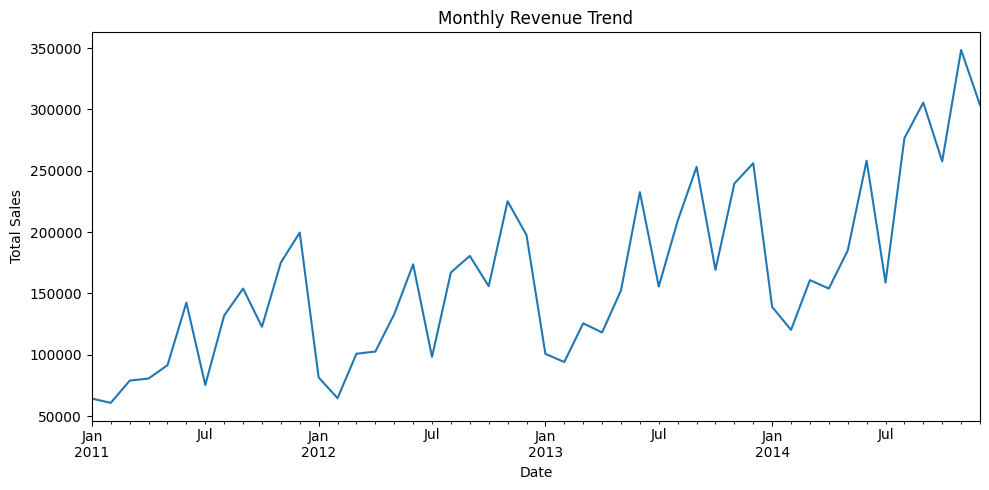

In [29]:
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.savefig("../visuals/plots/monthly_revenue_trend.png", dpi=300)
plt.show()



Monthly revenue shows short-term fluctuations, but the overall trend indicates steady growth over time.

Question #2

Category-level performance

In [31]:
category_perf = (
    raw_df
    .groupby('category')[['sales', 'profit']]
    .sum()
    .sort_values(by='sales', ascending=False)
)

category_perf


,sales,profit
category,,
Office Supplies,2790258.0,350107.32450
Technology,2638265.0,267573.47238
Furniture,2406605.0,97049.37790


Visualizing PROFIT

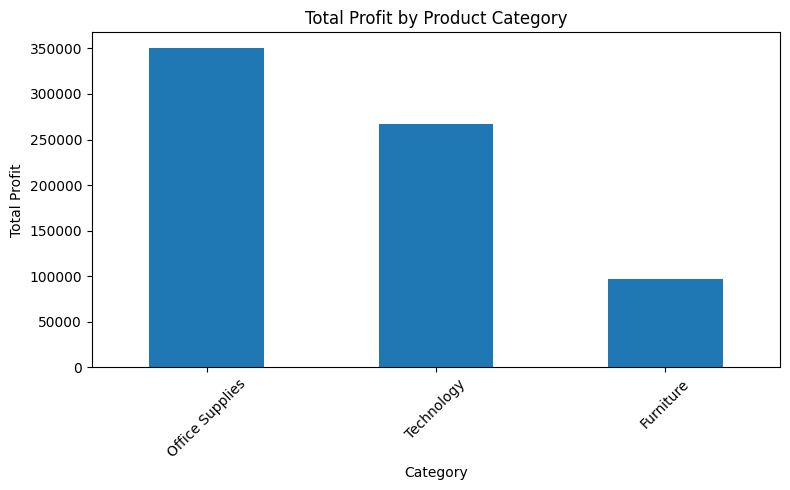

In [33]:
plt.figure(figsize=(8, 5))
category_perf['profit'].plot(kind='bar')
plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)


plt.tight_layout()
plt.savefig("../visuals/plots/profit_by_category.png", dpi=300)
plt.show()


Highest profit is given by "Office Supplies"